## Lab 3: Nearest Neighbor Method (kNN)

As part of this lesson, we will create a model for predicting the surviving passengers on the Titanic (a classic kaggle training [competition](https://www.kaggle.com/c/titanic)).

![Titanic](http://staff.mmcs.sfedu.ru/~sguda/MachineLearning/titanic.png)

## 1

Read the data about those who died in the Titanic disaster. The target feature here is the fact that the passenger was saved. Look at the data.

In [1]:
import pandas as pd

In [2]:
# place for code
data = pd.read_csv('data.csv')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# place for code


In [4]:
# place for code


For simplicity, exclude passengers with an unknown age and re-number the rows

*Features that may be useful: `.dropna(subset='Age'), .reset_index(drop=True)`*

In [5]:
# place for code
clean_data = data.dropna(subset=['Age']).reset_index()
clean_data.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
710,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
711,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
712,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
713,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


## 2

Plot the scatter plot with age as the abscissa axis and ticket price as the ordinate axis. Mark the dead in red, and the survived passengers in green. Build 2 separate scatter plots: for women and for men.

Does the compactness hypothesis hold for the given set?

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

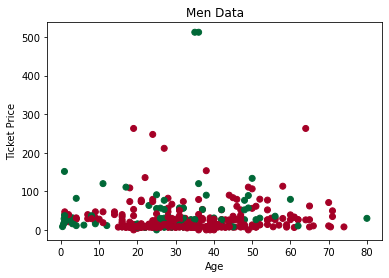

In [7]:
# place for code
men = clean_data['Sex']=='male'
plt.scatter(x=clean_data.loc[men, 'Age'],y=clean_data.loc[men, 'Fare'], c=clean_data.loc[men, 'Survived'], cmap='RdYlGn')
plt.title('Men Data')
plt.xlabel('Age')
plt.ylabel('Ticket Price')
plt.show()

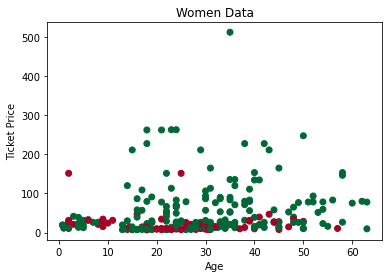

In [8]:
# place for code
women = clean_data['Sex']=='female'
plt.scatter(x=clean_data.loc[women, 'Age'],y=clean_data.loc[women, 'Fare'], c=clean_data.loc[women, 'Survived'], cmap='RdYlGn')
plt.title('Women Data')
plt.xlabel('Age')
plt.ylabel('Ticket Price')
plt.show()


# yes the compactness hypothesis holds for set.

## 3 

To build the model, we will need a passenger proximity metric. Build the function for calculating the distance between passengers:

In [9]:
def distance(a,b):
    d = 0
    d += abs(a['Pclass'] - b['Pclass'])
    d += a['Sex'] != b['Sex']
    d += abs(a['Age'] - b['Age'])
    d += abs(a['SibSp'] - b['SibSp'])
    d += abs(a['Parch'] - b['Parch'])
    d += abs(a['Fare'] - b['Fare'])
    d += a['Embarked'] != b['Embarked']
    return d

The `KNeighborsClassifier` method from the `sklearn` library is unnecessarily demanding on data types. Programming the `k` nearest neighbor method manually:

In [10]:
import numpy as np
import tqdm

In [11]:
def my_distance(a,b):
    d = 0
    d += abs(a['Pclass'] - b['Pclass'])
    d += a['Sex'] != b['Sex']
    d += abs(a['SibSp'] - b['SibSp'])
    d += a['Embarked'] != b['Embarked']
    return d

def myKNeighborsClassifier(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:  # LOO error control method
            dists[i][0] = my_distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i += 1
    dists = sorted(dists, key = lambda pair: pair[0])
    prediction = 0
    for i in range(K): 
        prediction += dists[i][1]
    prediction /= K
    return round(prediction)

Run prediction for all passengers on the ship and use the LOO control to evaluate the classification quality:

In [12]:
accuracy = 0
for idx, row in tqdm.tqdm(clean_data.iterrows(), total=len(clean_data)):
    accuracy += row['Survived'] == myKNeighborsClassifier(clean_data, 7, idx)
print(accuracy/clean_data.shape[0])


100%|██████████| 714/714 [02:14<00:00,  5.32it/s]0.8011204481792717



Select the terms in the metric, their weights, and the number of neighbors so that the classification quality would be as high as possible. 

If a function in `python` runs for a long time, use its equivalent in 
C++: `KNeighborsClassifier.cpp`.

Compilation on Linux is performed by the command 

 g++ - O2 KNeighborsClassifier.cpp -o KNeighborsClassifier


Launch: 

 ./KNeighborsClassifier
    
Who built the metric with the best quality: +5 bonus points.

## 4

Create a copy of the `KNeighborsClassifier` function and change it to calculate the margins of objects. Call it calcMargin.

Calculate the margins for all objects and output information about the five objects with the minimum margin (outliers) and the five objects with the maximum margin (etalons). Explain the result in comments.

In [13]:
# place for code
def calMargin(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:  # LOO error control method
            dists[i][0] = my_distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i += 1
    dists = sorted(dists, key = lambda pair: pair[0])
    margin = 0
    for i in range(K): 
        if dists[i][1] == learnData.loc[passengerIndexForPrediction, 'Survived']:
            margin +=1
        else:
            margin -=1
    return margin

margins = [0]*len(clean_data)
for idx, row in tqdm.tqdm(clean_data.iterrows(), total=len(clean_data)):
    margins[idx] = calMargin(clean_data, 7, idx)

100%|██████████| 714/714 [02:24<00:00,  4.94it/s]


This is most easily done using the `np.argsort` function, which returns the indexes of elements in the sorted row:

In [14]:
idx = np.argsort(margins)

In [15]:
print('Black sheeps (outliers)')
clean_data.loc[idx[:5],]

Black sheeps (outliers)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
406,510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.750,NaN,Q
287,357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.000,NaN,S
525,664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.925,NaN,S
158,199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
280,348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.900,NaN,S


In [16]:
print('Etalons (typical objects)')
clean_data.loc[idx[-5:],]

Etalons (typical objects)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
561,706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.500,NaN,S
248,311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
563,708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.550,NaN,S
570,717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.500,E101,S
356,443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.000,NaN,S
